# Image pyramids

In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message ignore
import warnings
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [2]:
import imutils

def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
    
    while True:
        ####################################
        # To Do : image resize
        # imutils.resize(src_image, width=w)
        ##################################### 
        w = int(image.shape[1]/scale)
        image = imutils.resize(image, width=w)
        
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
            
        yield image

In [3]:
import cv2
import matplotlib.pyplot as plt

args = {'image' : './images/source_01.jpg',
            'scale' : 1.5}
print(args)

{'image': './images/source_01.jpg', 'scale': 1.5}


In [4]:
image = cv2.imread(args['image'])
image.shape

(488, 650, 3)

<Figure size 720x1152 with 0 Axes>

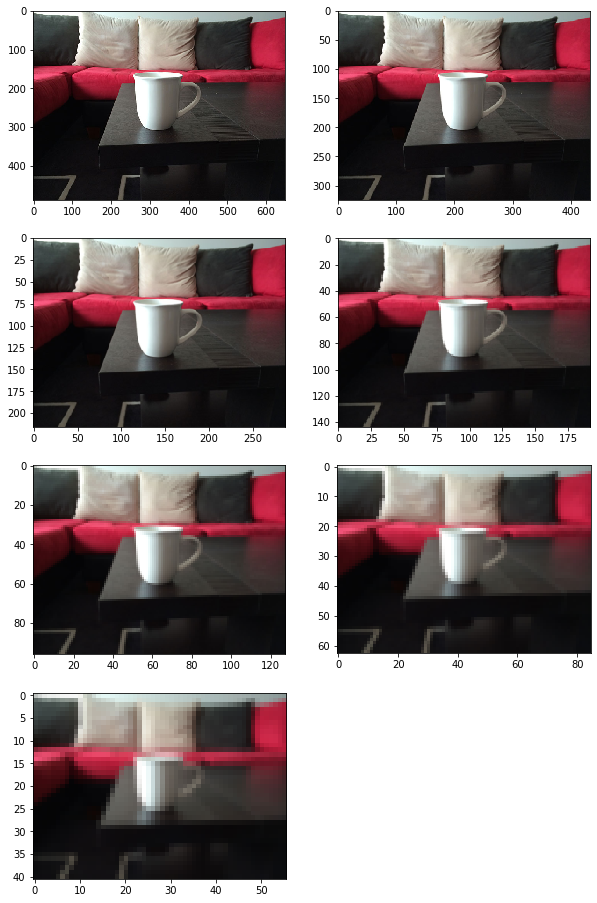

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,16))

for (i, layer) in enumerate(pyramid(image, scale=args['scale'])):
    plt.subplot(4, 2, i+1)
    plt.imshow(layer[:,:,::-1])